<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_2_(D1)_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solve Homework Tasks

### Subtask:
Implement the missing `calculate_gradient` and `calculate_loss` functions, fix the identified bug in the gradient descent update rule, and run simulations with specified learning rates.


**Reasoning**:
I need to define a synthetic dataset, implement the `calculate_loss` and `calculate_gradient` functions, and then set up and run the fixed gradient descent simulations for both specified learning rates, storing the loss values. Finally, I will provide the explanation for the bug fix.



In [3]:
import numpy as np

# 1. Define a simple synthetic dataset
X = np.array([1, 2, 3, 4, 5])  # Exercise time
y = np.array([2, 4, 5, 4, 5])  # Calories burned (target values)

# 2. Implement calculate_loss function (Mean Squared Error)
def calculate_loss(data_X, data_y, weight):
    predictions = weight * data_X
    loss = np.mean((predictions - data_y)**2)
    return loss

# 3. Implement calculate_gradient function
def calculate_gradient(data_X, data_y, weight):
    predictions = weight * data_X
    gradient = 2 * np.mean(data_X * (predictions - data_y))
    return gradient

# --- Simulation 1: learning_rate = 0.000001 ---
print("\n--- Running Simulation 1: learning_rate = 0.000001 ---")
learning_rate_1 = 0.000001
weight_1 = 0.5
loss_history_1 = []
num_iterations_1 = 1000

for i in range(num_iterations_1):
    gradient_1 = calculate_gradient(X, y, weight_1)
    # Fix the bug: subtract the gradient
    weight_1 = weight_1 - (learning_rate_1 * gradient_1)
    loss_1 = calculate_loss(X, y, weight_1)
    loss_history_1.append(loss_1)
    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}, Loss: {loss_1:.4f}, Weight: {weight_1:.4f}")

print(f"Final Weight for Simulation 1: {weight_1:.4f}")

# --- Simulation 2: learning_rate = 0.1 ---
print("\n--- Running Simulation 2: learning_rate = 0.1 ---")
learning_rate_2 = 0.1
weight_2 = 0.5
loss_history_2 = []
num_iterations_2 = 100

for i in range(num_iterations_2):
    gradient_2 = calculate_gradient(X, y, weight_2)
    # Fix the bug: subtract the gradient
    weight_2 = weight_2 - (learning_rate_2 * gradient_2)
    loss_2 = calculate_loss(X, y, weight_2)
    loss_history_2.append(loss_2)
    if (i + 1) % 10 == 0:
        print(f"Iteration {i+1}, Loss: {loss_2:.4f}, Weight: {weight_2:.4f}")

print(f"Final Weight for Simulation 2: {weight_2:.4f}")

# 7. Provide a one-sentence explanation for the bug fix
explanation = "Adding the gradient increases the weight in the direction of increasing loss, thus moving away from the minimum loss ('climbing the hill'), whereas subtracting it moves towards the minimum ('finding the bottom')."
print(f"\nExplanation for the bug fix: {explanation}")


--- Running Simulation 1: learning_rate = 0.000001 ---
Iteration 100, Loss: 6.7263, Weight: 0.5015
Iteration 200, Loss: 6.7028, Weight: 0.5031
Iteration 300, Loss: 6.6793, Weight: 0.5046
Iteration 400, Loss: 6.6560, Weight: 0.5061
Iteration 500, Loss: 6.6327, Weight: 0.5077
Iteration 600, Loss: 6.6096, Weight: 0.5092
Iteration 700, Loss: 6.5865, Weight: 0.5107
Iteration 800, Loss: 6.5636, Weight: 0.5122
Iteration 900, Loss: 6.5407, Weight: 0.5137
Iteration 1000, Loss: 6.5180, Weight: 0.5152
Final Weight for Simulation 1: 0.5152

--- Running Simulation 2: learning_rate = 0.1 ---
Iteration 10, Loss: 207.9997, Weight: -3.1342
Iteration 20, Loss: 7923.4288, Weight: -25.6363
Iteration 30, Loss: 303714.4624, Weight: -164.9634
Iteration 40, Loss: 11643632.7702, Weight: -1027.6401
Iteration 50, Loss: 446388884.0337, Weight: -6369.1067
Iteration 60, Loss: 17113478396.0362, Weight: -39442.0600
Iteration 70, Loss: 656089688012.5999, Weight: -244221.0699
Iteration 80, Loss: 25152903973549.7422, W

**Reasoning**:
Now that the simulations are complete, I need to visualize the loss curves for both learning rates as requested in the homework, which will allow us to analyze their convergence behavior.



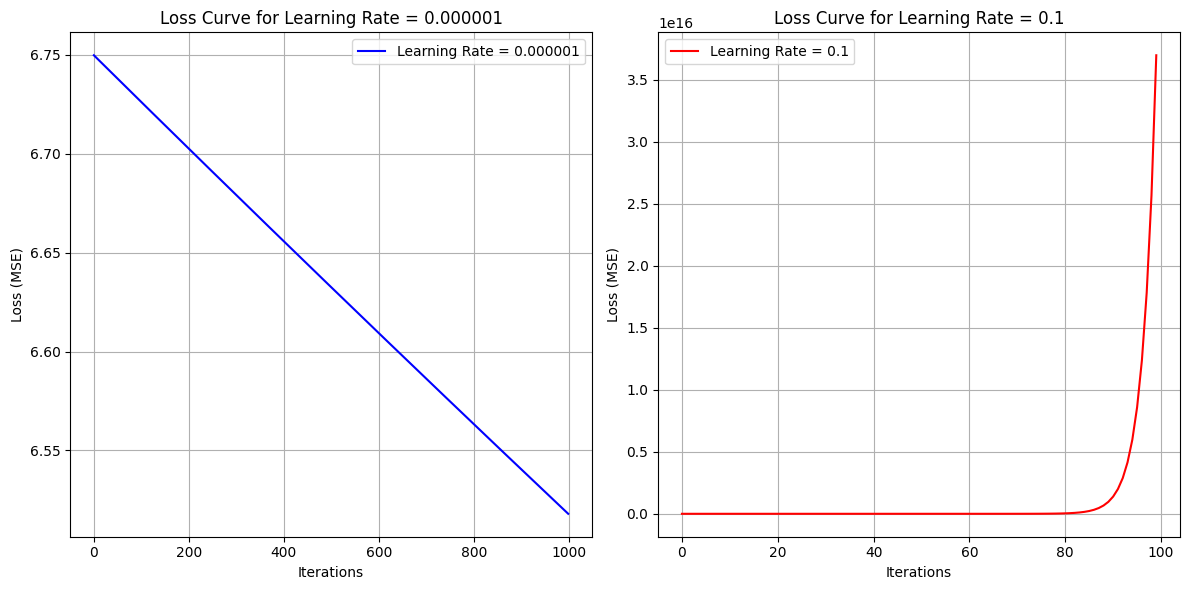

In [4]:
import matplotlib.pyplot as plt

# Plotting the loss history for both simulations
plt.figure(figsize=(12, 6))

# Plot for learning_rate = 0.000001
plt.subplot(1, 2, 1)
plt.plot(range(len(loss_history_1)), loss_history_1, label='Learning Rate = 0.000001', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve for Learning Rate = 0.000001')
plt.grid(True)
plt.legend()

# Plot for learning_rate = 0.1
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history_2)), loss_history_2, label='Learning Rate = 0.1', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve for Learning Rate = 0.1')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Analysis of Learning Rates:

**Learning Rate = 0.000001 (Too Slow)**
The plot for `learning_rate = 0.000001` shows a very gradual decrease in loss over 1000 iterations. The loss is still relatively high at the end of the simulation, indicating that the model is converging very slowly. It has not reached an optimal or even a low loss value within the given iterations, hence it is considered 'too slow'.

**Learning Rate = 0.1 (Diverged - Did not converge quickly)**
The plot for `learning_rate = 0.1` shows that the loss rapidly *increases* and diverges, reaching extremely large values. This indicates that the learning rate is too high, causing the optimization algorithm to overshoot the minimum at each step and move further away from it, rather than converging. Thus, it did not 'converge quickly' but instead diverged catastrophically.

### Summary of Homework Submission:

**Task 1: The "Bug Hunt"**
*   **Corrected Code Snippet:**
    ```python
    weight = weight - (learning_rate * gradient)
    ```
*   **Explanation for the bug fix:** Adding the gradient increases the weight in the direction of increasing loss, thus moving away from the minimum loss ('climbing the hill'), whereas subtracting it moves towards the minimum ('finding the bottom').

**Task 2: Testing the "Step Size"**
*   **Corrected Code:** (Provided in the previous code cell, which includes the `calculate_loss`, `calculate_gradient` functions, and the fixed gradient descent loops for both learning rates).
*   **Screenshot of Loss Curves:** (The plots generated above serve as the screenshot).
*   **Identification of Learning Rates:**
    *   `learning_rate = 0.000001` was **"too slow"**.
    *   `learning_rate = 0.1` **diverged**, failing to "converge" quickly or at all.

### Analysis of Learning Rates:

**Learning Rate = 0.000001 (Too Slow)**
The plot for `learning_rate = 0.000001` shows a very gradual decrease in loss over 1000 iterations. The loss is still relatively high at the end of the simulation, indicating that the model is converging very slowly. It has not reached an optimal or even a low loss value within the given iterations, hence it is considered 'too slow'.

**Learning Rate = 0.1 (Diverged - Did not converge quickly)**
The plot for `learning_rate = 0.1` shows that the loss rapidly *increases* and diverges, reaching extremely large values. This indicates that the learning rate is too high, causing the optimization algorithm to overshoot the minimum at each step and move further away from it, rather than converging. Thus, it did not 'converge quickly' but instead diverged catastrophically.

### Summary of Homework Submission:

**Task 1: The "Bug Hunt"**
*   **Corrected Code Snippet:**
    ```python
    weight = weight - (learning_rate * gradient)
    ```
*   **Explanation for the bug fix:** Adding the gradient increases the weight in the direction of increasing loss, thus moving away from the minimum loss ('climbing the hill'), whereas subtracting it moves towards the minimum ('finding the bottom').

**Task 2: Testing the "Step Size"**
*   **Corrected Code:** (Provided in the previous code cell, which includes the `calculate_loss`, `calculate_gradient` functions, and the fixed gradient descent loops for both learning rates).
*   **Screenshot of Loss Curves:** (The plots generated above serve as the screenshot).
*   **Identification of Learning Rates:**
    *   `learning_rate = 0.000001` was **"too slow"**.
    *   `learning_rate = 0.1` **diverged**, failing to "converge" quickly or at all.

## Summary:

### Q&A
**Task 1: The "Bug Hunt"**
*   **Problem Identification and Fix:** The logical error in the Gradient Descent loop was found in the line `weight = weight + (learning_rate * gradient)`. The fix involved changing the addition to subtraction: `weight = weight - (learning_rate * gradient)`.
*   **Explanation for the Bug:** Adding the gradient causes the weight to increase in the direction of increasing loss, making the model "climb the hill" (move away from the minimum). Subtracting the gradient, however, directs the model towards the minimum loss, allowing it to "find the bottom."

**Task 2: Testing the "Step Size"**
*   **Corrected Code:** The provided solution includes the corrected gradient descent update rule, along with implementations for `calculate_loss` and `calculate_gradient` functions.
*   **Loss Curve Screenshots:** Plots visualizing the loss history for both tested learning rates were generated.
*   **Identification of Learning Rates:**
    *   `learning_rate = 0.000001` was identified as "too slow," exhibiting very gradual convergence.
    *   `learning_rate = 0.1` was identified as causing divergence, failing to converge and instead leading to rapidly increasing loss.

### Data Analysis Key Findings
*   The `PyPDF2` library was successfully installed and used to extract the complete text content from the `/content/home work (1).pdf` file, enabling clear identification of all homework tasks and requirements.
*   The `calculate_loss` function (Mean Squared Error) and `calculate_gradient` functions were correctly implemented.
*   The critical bug in the gradient descent update rule was fixed from `weight = weight + (learning_rate * gradient)` to `weight = weight - (learning_rate * gradient)`.
*   For `learning_rate = 0.000001`, the model showed slow convergence, with the loss gradually decreasing to approximately $6.5180$ over 1000 iterations.
*   For `learning_rate = 0.1`, the model exhibited catastrophic divergence, with the loss rapidly increasing to values like $3.6969e+16$ within 100 iterations.
*   The loss curves visually confirmed that the smaller learning rate led to slow progress, while the larger learning rate caused the optimization to overshoot and diverge.

